## Mini Project ( Product-Sales-Outlet-at-BigMart-Datawarehouse )
#### by Billy

### Problem Statement:  
1. The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. The products and stores have also been defined based on certain attributes.   
2. The goal of this data science project is to build a predictive model and determine the sales of each product at a particular store.   
3. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


### Hypothesis Generation  
1. Store size: stores with big sizes should have more offers and sales on various products.
2. Location: The better the place, the more sales at the outlet.


### Loading Packages and Data 

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Loading Packages and Data 
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Technocolabs/Mini project/Train.csv')

test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Technocolabs/Mini project/Test.csv')

### Exploratory data analysis

In [3]:
def basic_info(df):
    print("This dataset has ", df.shape[1], " columns and ", df.shape[0], " rows.")
    print("This dataset has ", df[df.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Descriptive statistics of the numeric features in the dataset: ")
    print(" ")
    print(df.describe())
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(df.info())

In [4]:
def eda(data):
    print("----------Top-5- Record----------")
    print(data.head(5))
    print("-----------Data Types-----------")
    print(data.dtypes)
    print("----------Missing value-----------")
    print(data.isnull().sum())
    print("----------Null value-----------")
    print(data.isna().sum())
    print("----------Shape of Data----------")
    print(data.shape)


In [5]:
def graph_insight(data):
    print(set(data.dtypes.tolist()))
    df_num = data.select_dtypes(include = ['float64', 'int64'])
    df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8)

In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
basic_info(train)

This dataset has  12  columns and  8523  rows.
This dataset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dataset: 
 
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  


In [9]:
eda(train)

----------Top-5- Record----------
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1

In [10]:
basic_info(test)

This dataset has  11  columns and  5681  rows.
This dataset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dataset: 
 
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000
 
Information about this dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column        

In [11]:
eda(test)

----------Top-5- Record----------
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0 

#### Univariate Analysis - Continuous variable

{dtype('O'), dtype('int64'), dtype('float64')}


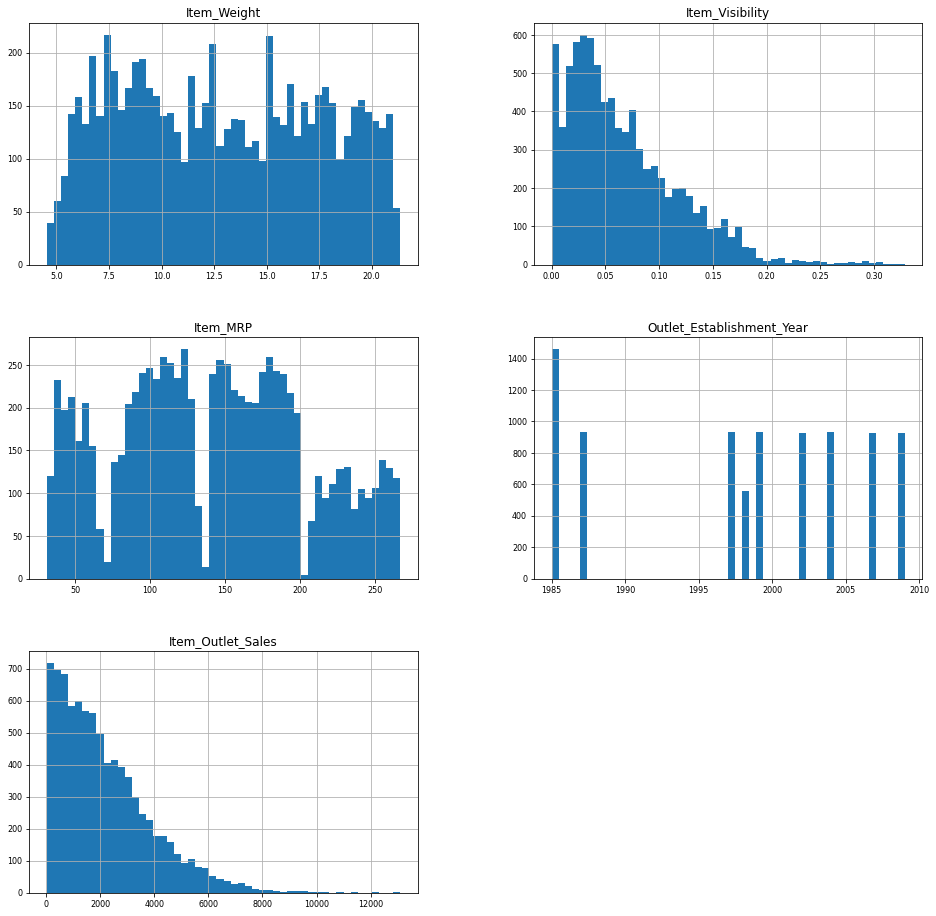

In [12]:
graph_insight(train)

In [13]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

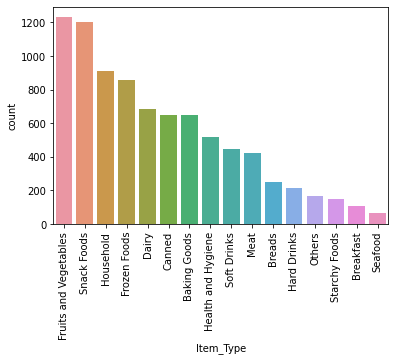

In [14]:
sns.countplot(train.Item_Type,order = train["Item_Type"].value_counts().index)
plt.xticks(rotation=90)

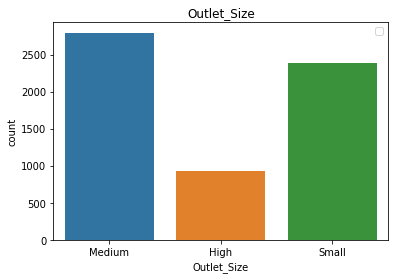

In [15]:
sns.countplot(train['Outlet_Size'])
plt.title('Outlet_Size')
plt.legend()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

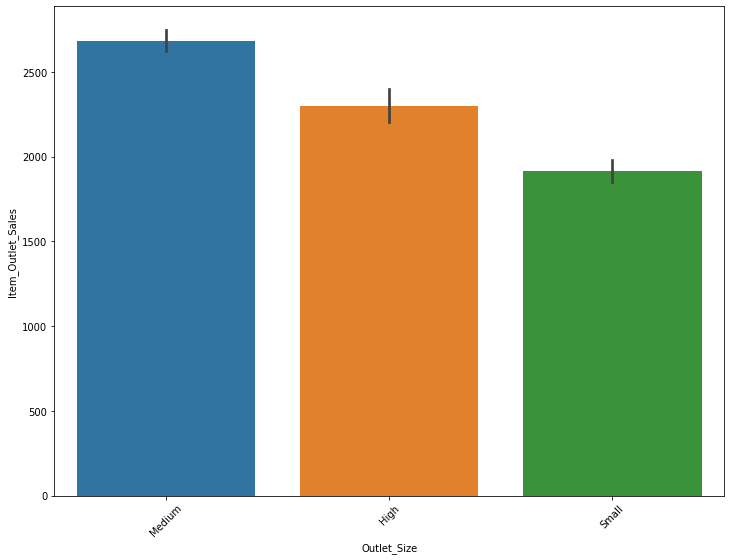

In [16]:
plt.figure(figsize=(12,9))
sns.barplot(x=train['Outlet_Size'],y=train['Item_Outlet_Sales'])
plt.xticks(rotation=45)

### Bivariate Analysis
Bivariate analysis refers to the analysis of two variables.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


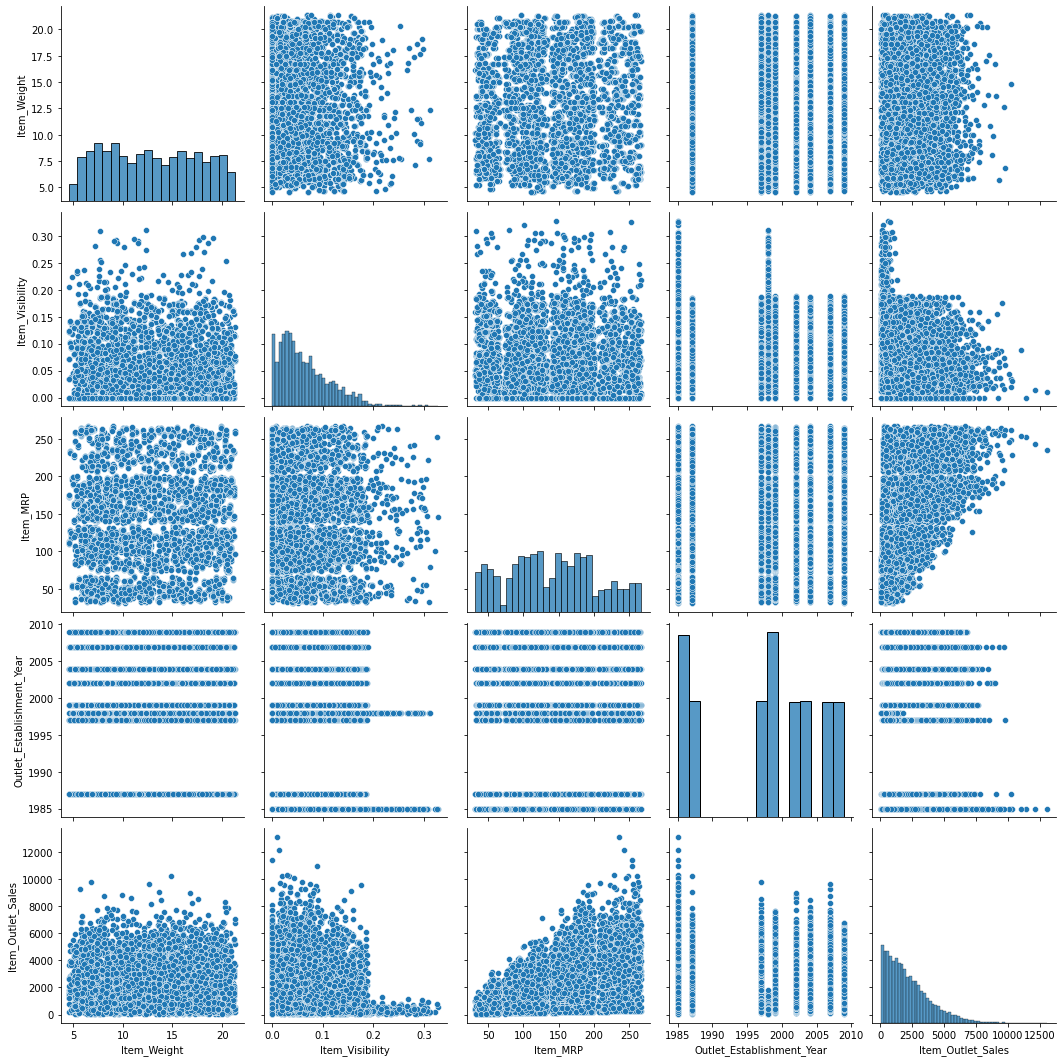

In [17]:
c_feature = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
sns.pairplot(train[c_feature], size=3)

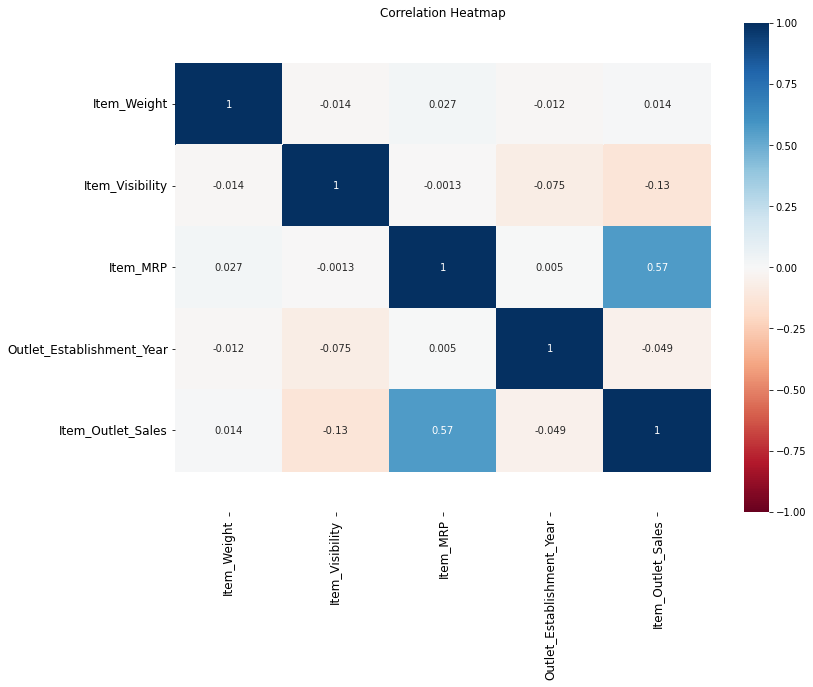

In [18]:
#See the correlation between variables
plt.figure(figsize = (12, 9))
s = sns.heatmap(train.corr(), annot = True, cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.show()

### Missing Value Treatment

In [19]:
# percent of data that is missing
train.isnull().sum()/train.shape[0]*100 

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [20]:
test.isnull().sum()/test.shape[0]*100 

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [21]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [22]:
#Filling the Missing Values – Imputation
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace = True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace = True)

In [23]:
print(train['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [24]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

In [25]:
train.isnull().sum()/train.shape[0]*100 

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [26]:
test.isnull().sum()/test.shape[0]*100 

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64

### Feature engineering
Feature Engineering is the way of extracting features from data and transforming them into formats that are suitable for Machine Learning algorithms.

In [27]:
train.corr()['Item_Outlet_Sales']

Item_Weight                  0.011550
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [28]:
#Remove 'Outlet_Identifier','Item_Identifier' since everyone has an unique ID.
train=train.drop(['Outlet_Identifier','Item_Identifier'],axis=1)

In [29]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


### Preprocessing

In [30]:
# Get list of categorical variables
s = (train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [31]:
train[object_cols]

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1
...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


#### Encoding Categorical Variables
LabelEncoder: ['Item_Fat_Content' , 'Outlet_Size', 'Outlet_Location_Type']   
One-hot Encoder: [ 'Item_Type', 'Outlet_Type'] (the features do not have any order) 

In [32]:
# Encoding Categorical variables for both test and train using LabelEncoder
# Encoding train

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['Item_Fat_Content' , 'Outlet_Size', 'Outlet_Location_Type']
for col in cat_col:
    train[col] = le.fit_transform(train[col])

# Encoding test
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['Item_Fat_Content' , 'Outlet_Size', 'Outlet_Location_Type']
for col in cat_col:
    test[col] = le.fit_transform(test[col])
  

In [33]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,Dairy,249.8092,1999,1,0,Supermarket Type1,3735.1380
1,5.92,2,0.019278,Soft Drinks,48.2692,2009,1,2,Supermarket Type2,443.4228
2,17.50,1,0.016760,Meat,141.6180,1999,1,0,Supermarket Type1,2097.2700
3,19.20,2,0.000000,Fruits and Vegetables,182.0950,1998,1,2,Grocery Store,732.3800
4,8.93,1,0.000000,Household,53.8614,1987,0,2,Supermarket Type1,994.7052


In [34]:
# One-hot Encoder
train = pd.get_dummies(train, columns=[ 'Item_Type', 'Outlet_Type'])
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,1,0.016047,249.8092,1999,1,0,3735.1380,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,2,0.019278,48.2692,2009,1,2,443.4228,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,1,0.016760,141.6180,1999,1,0,2097.2700,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,2,0.000000,182.0950,1998,1,2,732.3800,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,1,0.000000,53.8614,1987,0,2,994.7052,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
test =  pd.get_dummies(test, columns=[ 'Item_Type', 'Outlet_Type'])

In [36]:
eda(train)

----------Top-5- Record----------
   Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0         9.30                 1         0.016047  249.8092   
1         5.92                 2         0.019278   48.2692   
2        17.50                 1         0.016760  141.6180   
3        19.20                 2         0.000000  182.0950   
4         8.93                 1         0.000000   53.8614   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                       1999            1                     0   
1                       2009            1                     2   
2                       1999            1                     0   
3                       1998            1                     2   
4                       1987            0                     2   

   Item_Outlet_Sales  Item_Type_Baking Goods  Item_Type_Breads  ...  \
0          3735.1380                       0                 0  ...   
1           443.4228                      

### Splitting the data set into Train(80%),test(20%) dataset

In [37]:
x=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales'] #target variable

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

In [39]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Modeling
* Linear Regression
* Regularized Linear Regression(Lasso)
* Regularized Linear Regression (Ridge)
* Regularized Linear Regression
* RandomForest
* XGBoost

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

#### Linear Regression

In [41]:
#Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
print("R2 score is:",r1) 
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_pred)))

R2 score is: 0.5614179706573661
Mean Absolute Error: 852.3973926016602


#### Regularized Linear Regression(Lasso)

In [42]:
ls = Lasso(alpha=0.01, normalize=True)
ls.fit(x_train, y_train)
y_pred  = ls.predict(x_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2 score is:",r2) 
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_pred)))

R2 score is: 0.5615684146694419
Mean Absolute Error: 852.1952816751782


#### Regularized Linear Regression (Ridge)

In [43]:
Rg = Ridge(alpha=0.01, normalize=True)
Rg.fit(x_train,y_train)
y_pred = Rg.predict(x_test)

from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
print("R2 score is:",r3) 
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_pred)))

R2 score is: 0.5613094734225035
Mean Absolute Error: 852.3599377130115


#### RandomForest

In [44]:
# RandomForest
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
print("R2 score is:",r4) 
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_pred)))

R2 score is: 0.5492098309735951
Mean Absolute Error: 826.1141785889083


#### XGBoost

In [45]:
# XGBoost
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)

from sklearn.metrics import r2_score
r5 = r2_score(y_test,y_pred)
print("R2 score is:",r5) 
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_pred)))

[11:38:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score is: 0.5945621990314656
Mean Absolute Error: 772.9367252215379


### Conclusion
Model performance: (good-bad: 1-5, MAE)
1. XGBoost
2. RandomForest
3. Regularized Linear Regression(Lasso)
4. Regularized Linear Regression (Ridge)
5. Linear Regression